In [44]:
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [45]:

filename = "./data/changed_a_5000ts_10e_data" 

# Getting back the objects:
with open(filename, 'rb') as f:
    stats, funds_wealth_all_episodes, learning_fund_stats = pickle.load(f)

### Total wealth

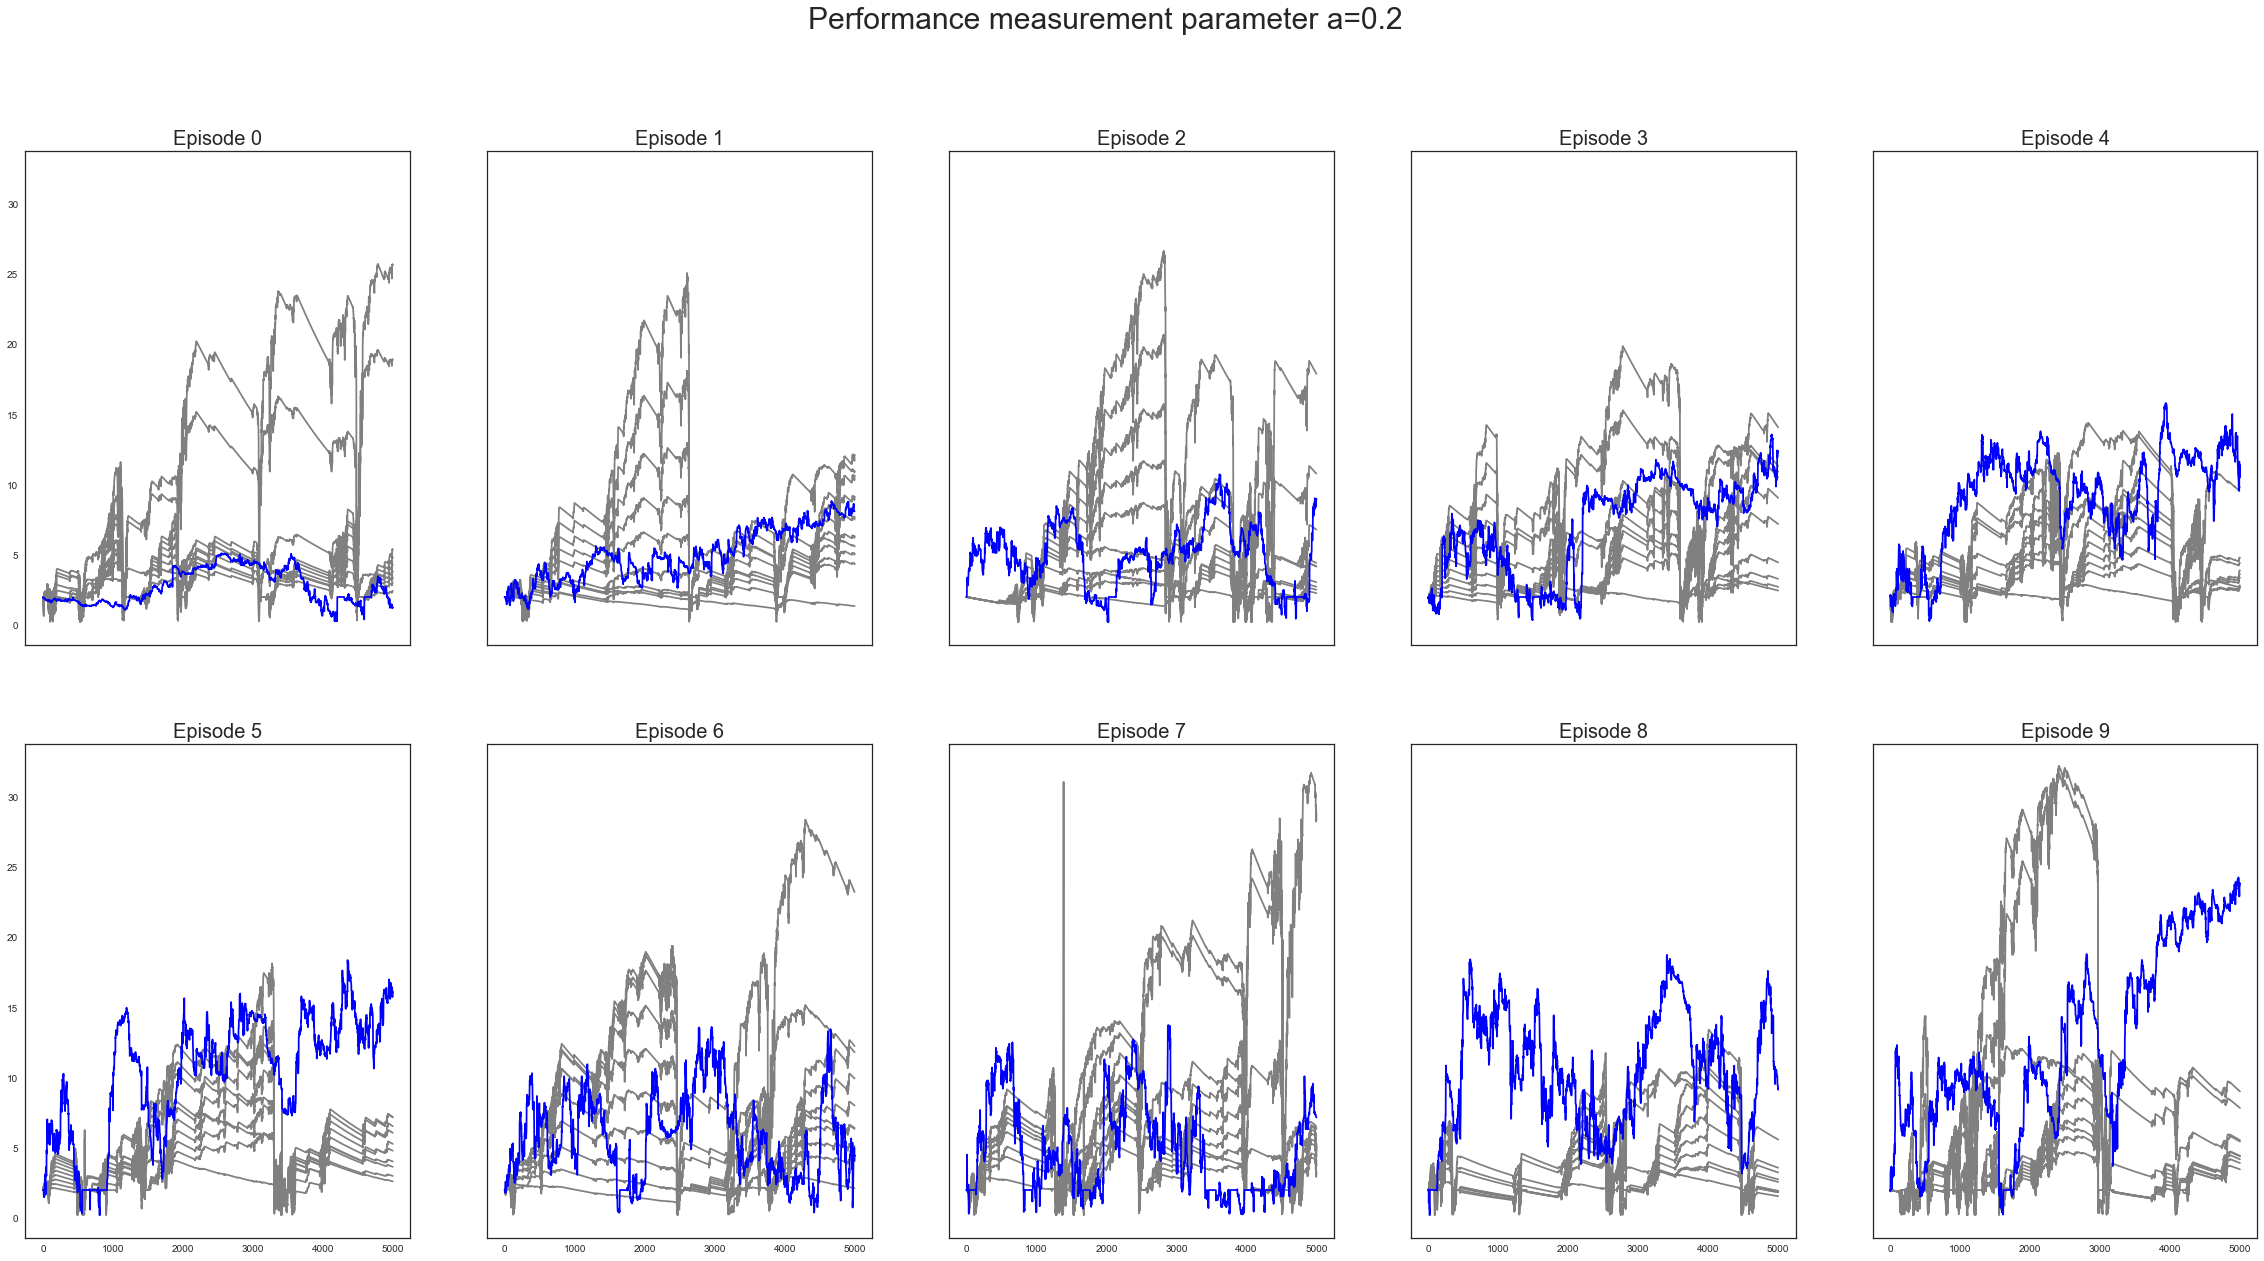

In [46]:
# assumes 10 episodes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True,
                         sharey=True,figsize=(40,20)
                        )

for i, ax in enumerate(axes.flatten()):

    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')
        
    ax.set_title("Episode {}".format(i), {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Performance measurement parameter a=0.2", fontsize=30);

# Saving
#fig.savefig("./figures/{}.png".format(experiment_name))

### Learning Fund

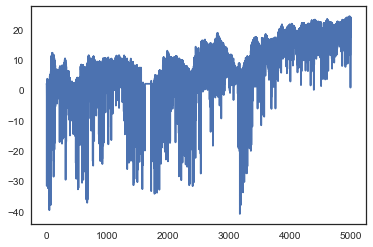

In [55]:
mapping = {'price':0,
           'demand':1,
           'wealth':2,
           'cash':3,
           'shares':4}

variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

variable = mapping['cash']
episode_to_look_at = 9 

series = []
for i in range(len(learning_fund_stats[episode_to_look_at])):
    series.append(learning_fund_stats[episode_to_look_at][i][variable])

plt.plot(series);

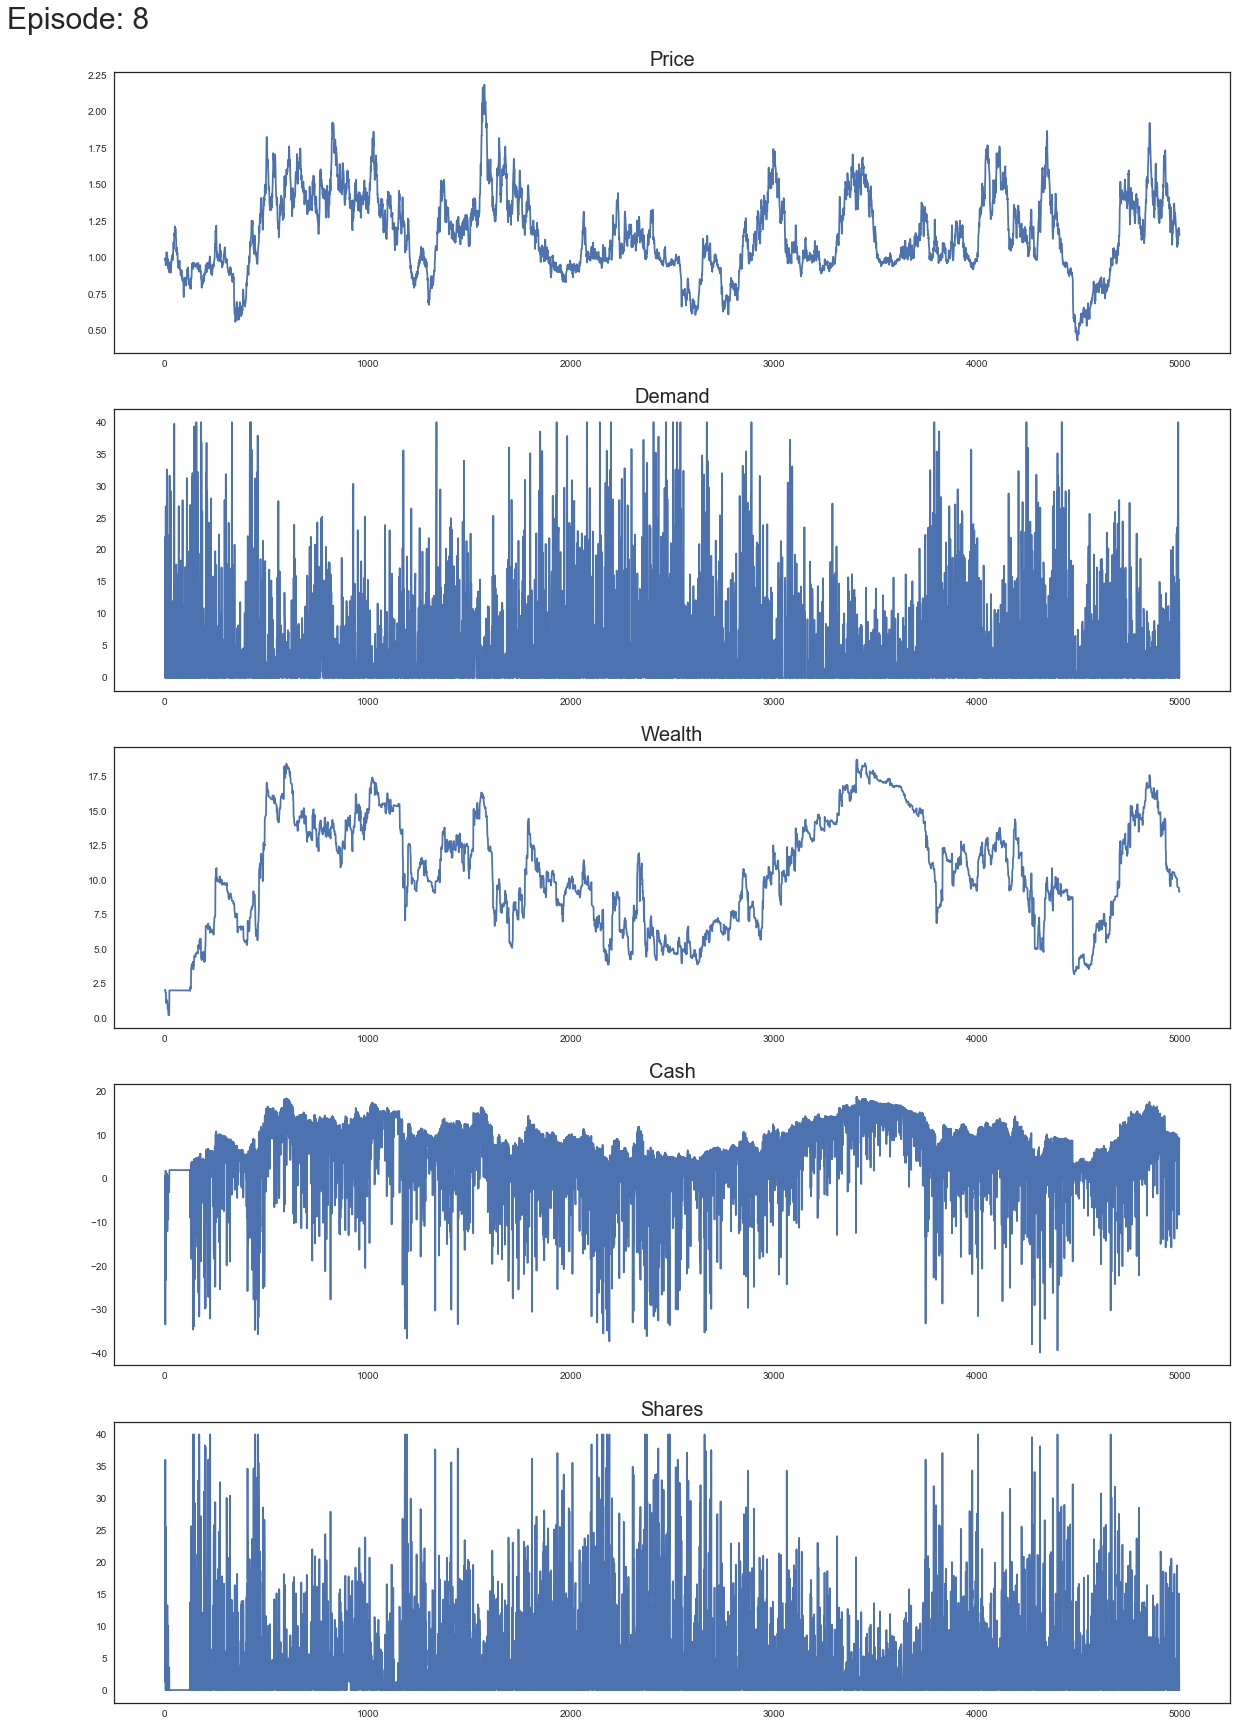

In [89]:
variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,30))

episode_to_look_at = 8 

for i, ax in enumerate(axes.flatten()):
    
    variable = i
    
    episode = learning_fund_stats[episode_to_look_at]
    
    ax.plot(episode.T[i])
        
    ax.set_title(variables[i], {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Episode: {}".format(episode_to_look_at),
             fontsize=30, x=0.1, y=0.91);